In [1]:
dataroot = "data/TTile"
from PIL import Image
import torchvision.transforms.functional as TF
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import random
import time

%matplotlib inline

In [3]:


Image.MAX_IMAGE_PIXELS = None

imageT = Image.open("data/world_texturemap.jpg")
image = Image.open("data/world_heightmap.png")

x = TF.to_tensor(image)
x.unsqueeze_(0)
print(x.shape)

#output = model(X)

torch.Size([1, 1, 10800, 21600])


In [4]:
transt = transforms.ToTensor()
transp = transforms.ToPILImage()
img_h = transt(Image.open('data/world_heightmap.png'))
#img_h = transt(Image.open('data/world_texturemap.jpg'))
img_t = transt(Image.open('data/world_texturemap.jpg'))


#torch.Tensor.unfold(dimension, size, step)
#slices the images into 8*8 size patches
patches = img_h.data.unfold(0, 1, 1).unfold(1, 64, 64).unfold(2, 64, 64)
patchest = img_t.data.unfold(0, 3, 3).unfold(1, 64, 64).unfold(2, 64, 64)

print(patches[0][0][0].shape)
print(patches.shape)

torch.Size([1, 64, 64])
torch.Size([1, 168, 337, 1, 64, 64])


In [4]:
print(type(patches[0][0][0]))
print(patches[0][0][0].shape)
#print(patches[0][0][0][0][1][62])
print(torch.all(torch.eq(patches[0][0][0], patches[0][1][1])))

<class 'torch.Tensor'>
torch.Size([1, 64, 64])
tensor(True)


In [5]:
print(patches[0][0][0].shape)
print(patches.shape)
def visualize(patches):
    """Imshow for Tensor."""    
    fig = plt.figure(figsize=(16, 16))
    #while(True):
    for i in range(4):
        for j in range(4):
            #inp = transforms.ToTensor(patches[0][i][j])
            #inp = np.array(inp)
            randomi = random.randint(0, 167)
            randomj = random.randint(0, 336)
            inp = transforms.ToPILImage()(patches[0][randomi][randomj])
            #display(im)
            if(torch.all(torch.eq(patches[0][0][0], patches[0][randomi][randomj]))):
                print("empty map found for image:[" +str(randomi)+"]["+str(randomj)+"]")
            else:
                print("good map found for image:[" +str(randomi)+"]["+str(randomj)+"]")

            ax = fig.add_subplot(4, 4, ((i*4)+j)+1, xticks=[], yticks=[])
            plt.imshow(inp)
            
            
        #time.sleep(3)
#print(patches[0][0][0].size())
#imgplot = plt.imshow(patches[0][0][0])



torch.Size([1, 64, 64])
torch.Size([1, 168, 337, 1, 64, 64])


empty map found for image:[96][56]
empty map found for image:[0][113]
empty map found for image:[82][245]
good map found for image:[157][267]
empty map found for image:[30][305]
empty map found for image:[117][162]
good map found for image:[83][179]
good map found for image:[7][227]
good map found for image:[22][68]
empty map found for image:[79][7]
good map found for image:[62][215]
empty map found for image:[16][71]
empty map found for image:[46][48]
good map found for image:[15][284]
empty map found for image:[140][76]
empty map found for image:[152][64]


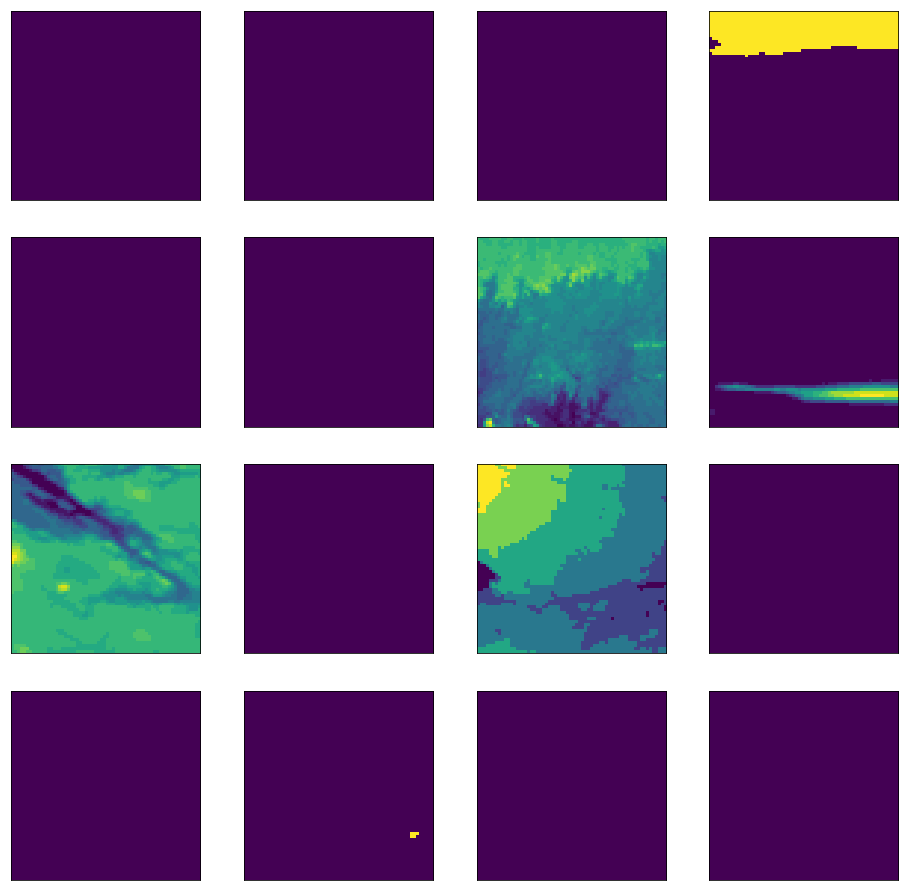

In [6]:
visualize(patches)


In [7]:
#from IPython.core.interactiveshell import InteractiveShell#
#InteractiveShell.ast_node_interactivity = "all"
print(patches[0][161][139])
print(type(patches[0][161][139]))
print(torch.max(patches[0][161][139]))

tensor([[[0.1608, 0.1608, 0.1608,  ..., 0.1804, 0.1804, 0.1804],
         [0.1647, 0.1647, 0.1647,  ..., 0.1804, 0.1804, 0.1804],
         [0.1647, 0.1647, 0.1647,  ..., 0.1843, 0.1843, 0.1843],
         ...,
         [0.2431, 0.2431, 0.2431,  ..., 0.2510, 0.2510, 0.2510],
         [0.2431, 0.2431, 0.2431,  ..., 0.2510, 0.2510, 0.2510],
         [0.2431, 0.2431, 0.2431,  ..., 0.2510, 0.2510, 0.2510]]])
<class 'torch.Tensor'>
tensor(0.2549)


In [11]:
def SaveValidMap(num):

    for i in range(168):
        for j in range(337):
            if(torch.all(torch.eq(patches[0][0][0], patches[0][i][j]))):
                continue
            elif((torch.max(patches[0][i][j])-torch.min(patches[0][i][j]))<=0.05):
                continue
            else:
                im = transforms.ToPILImage()(patches[0][i][j])
                imt = transforms.ToPILImage()(patchest[0][i][j])
                #im.save("data/HTile/img_align_HTile/tile"+str(num)+".jpg")
                imt.save("data/TTile/img_align_TTile/tile"+str(num)+".jpg")
                num-=1
                
            if (num==0):
                print(num)
                return
    return
                
def CountValidMap():
    num = 0
    for i in range(168):
        for j in range(337):
            if(torch.all(torch.eq(patches[0][0][0], patches[0][i][j]))):
                continue
            elif((torch.max(patches[0][i][j])-torch.min(patches[0][i][j]))<=0.05):
                continue
            else:
                num+=1
    return num

In [12]:
count=CountValidMap()
print(count)
SaveValidMap(count)

12107
0


In [31]:
from skimage.io import imread
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [39]:
texturemap = imread("data/world_texturemap.jpg")
heightmap = imread("data/world_heightma
                   p.png")


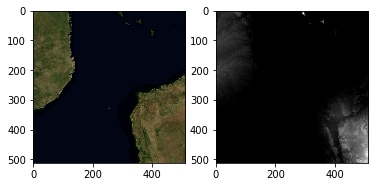

In [66]:
xoff, yoff = np.random.randint(0, heightmap.shape[1]), np.random.randint(0, heightmap.shape[0])
crp = heightmap[ yoff:yoff+512, xoff:xoff+512 ]
tx = texturemap[ yoff:yoff+512, xoff:xoff+512 ]
plt.subplot(1,2,1)
plt.imshow(tx)
plt.subplot(1,2,2)
plt.imshow(crp, cmap="gray")
#print ((crp==0).sum()*1.0) / np.prod(crp.shape)